# 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Load dataset

In [4]:
# Replace with your own dataset file
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Select features and target

In [6]:
# Example: predict 'Fare' using 'Pclass', 'Age', 'SibSp', 'Parch'
X = df[["Pclass", "Age", "SibSp", "Parch"]]
y = df["Fare"]

# 4. Handle missing values

In [8]:
X.loc[:, "Age"] = X["Age"].fillna(X["Age"].median())


# 5. Split dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train regression tree

In [12]:
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# 7. Predict on test set

In [14]:
y_pred = reg.predict(X_test)

# 8. Evaluate model

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Check 

In [18]:
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))
print("R2:", round(r2, 2))

RMSE: 34.47
MAE: 13.89
R2: 0.23


# Visualzation

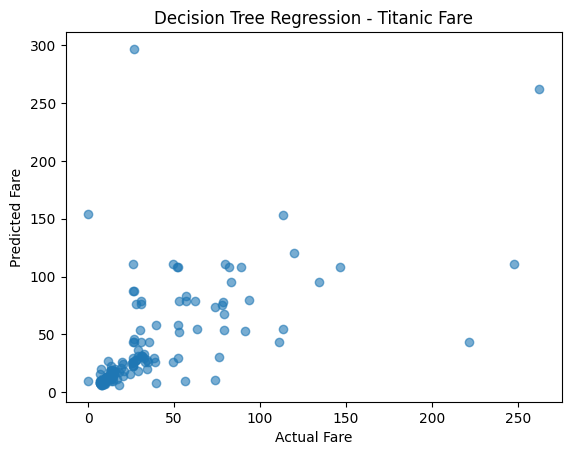

In [20]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Decision Tree Regression - Titanic Fare")
plt.show()
